In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [4]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 1.13.1


In [3]:
artist=pd.read_csv('/Users/florent/Documents/GitHub/Picasso/artists.csv')
artist.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [95]:
range(artist['paintings'][0])
#print(artist['id']==0)

range(0, 193)

In [4]:
train_image=[]


for j in range(len(artist['id'])):
    for i in range(1,artist['paintings'][j]+1):
        try:
            img=image.load_img('/Users/florent/Documents/GitHub/Picasso/resized/'+artist['name'][j].replace(" ","_")+'_'+str(i)+'.jpg',target_size=(50,50,3))
            img=image.img_to_array(img)
            img=img/255
            train_image.append(img)
        except OSError:
            pass

X=np.array(train_image)


In [98]:

X.shape

(8355, 50, 50, 3)

(918, 614, 3)


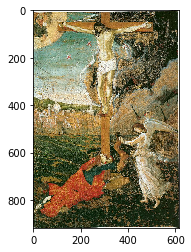

In [11]:
print(X[80].shape)
plt.imshow(X[80])

In [5]:
import os

files=os.listdir('/Users/florent/Documents/GitHub/Picasso/resized')
#print(files)
df=pd.DataFrame(files,columns=["label"])
df.head()
#artist=str(df['label'].split('_')[0]+" "+df['label'][0].split('_')[1])
artist=[]
#artist=pd.Series.str.split(df['label'],-1,False)
#df['label'].split
for i in range(len(df['label'])):
#    if df['label'][i].count("_")>=2:
#        df['label'][i].str.split("_",n=2,expand=True) 
#    else:
 #       new=df['label'][i].str.split("_",n=1,expand=True) 
#print(new[1])
    new=df['label'][i].split('_')
    new=new[0]+" "+new[1] if len(new)>=3 else new[0]
    artist.append(new)
print(artist)
df=pd.DataFrame(artist,columns=['label'])
#df['label']=new[0]+" "+new[1]
#df.head()
df.to_csv('train.csv')
#df['label']=new
#df.to_csv('train.csv')
del df

['Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht Dürer', 'Albrecht D

In [6]:
train=pd.read_csv('train.csv',index_col=0)
#pd.options.display.max_rows = None
#display(train)
print(train['label'])
train.shape

0       Albrecht Dürer
1       Albrecht Dürer
2       Albrecht Dürer
3       Albrecht Dürer
4       Albrecht Dürer
5       Albrecht Dürer
6       Albrecht Dürer
7       Albrecht Dürer
8       Albrecht Dürer
9       Albrecht Dürer
10      Albrecht Dürer
11      Albrecht Dürer
12      Albrecht Dürer
13      Albrecht Dürer
14      Albrecht Dürer
15      Albrecht Dürer
16      Albrecht Dürer
17      Albrecht Dürer
18      Albrecht Dürer
19      Albrecht Dürer
20      Albrecht Dürer
21      Albrecht Dürer
22      Albrecht Dürer
23      Albrecht Dürer
24      Albrecht Dürer
25      Albrecht Dürer
26      Albrecht Dürer
27      Albrecht Dürer
28      Albrecht Dürer
29      Albrecht Dürer
             ...       
8325     William Turner
8326     William Turner
8327     William Turner
8328     William Turner
8329     William Turner
8330     William Turner
8331     William Turner
8332     William Turner
8333     William Turner
8334     William Turner
8335     William

(8355, 1)

In [7]:
y=train['label']
y=y.factorize()[0]
print(y)
y=to_categorical(y)
y.shape

[ 0  0  0 ... 49 49 49]


(8355, 50)

In [8]:
#Creation of a validation set from the training data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [9]:
#Define the model structure
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(775,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,input_shape=(50,50,3),activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
#Training of the model without any dataeditor function, first, that prevent the overfitting of the model
model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 6684 samples, validate on 1671 samples
Epoch 1/10
 - 178s - loss: 3.6194 - acc: 0.1161 - val_loss: 3.3247 - val_acc: 0.1538
Epoch 2/10
 - 144s - loss: 3.2135 - acc: 0.1810 - val_loss: 3.1119 - val_acc: 0.2035
Epoch 3/10
 - 142s - loss: 2.8155 - acc: 0.2537 - val_loss: 3.0138 - val_acc: 0.2214
Epoch 4/10
 - 142s - loss: 2.2641 - acc: 0.3863 - val_loss: 3.0050 - val_acc: 0.2160
Epoch 5/10
 - 143s - loss: 1.5549 - acc: 0.5609 - val_loss: 3.2436 - val_acc: 0.2412
Epoch 6/10
 - 802s - loss: 0.9624 - acc: 0.7298 - val_loss: 3.6025 - val_acc: 0.2124
Epoch 7/10
 - 149s - loss: 0.5987 - acc: 0.8353 - val_loss: 3.8851 - val_acc: 0.2178
Epoch 8/10
 - 142s - loss: 0.4107 - acc: 0.8894 - val_loss: 4.1355 - val_acc: 0.2202
Epoch 9/10
 - 141s - loss: 0.3073 - acc: 0.9123 - val_loss: 4.4564 - val_acc: 0.2118
Epoch 10/10
 - 155s - loss: 0.2287 - acc: 0.9396 - val_loss: 4.5397 - val_acc: 0.2328


In [ ]:
#Résultat sans validation data
'''
Epoch 1/10
 - 172s - loss: 3.5407 - acc: 0.1213
Epoch 2/10
 - 168s - loss: 3.1797 - acc: 0.1812
Epoch 3/10
 - 150s - loss: 2.7963 - acc: 0.2620
Epoch 4/10
 - 155s - loss: 2.2025 - acc: 0.3965
Epoch 5/10
 - 158s - loss: 1.4401 - acc: 0.5977
Epoch 6/10
 - 146s - loss: 0.8907 - acc: 0.7509
Epoch 7/10
 - 143s - loss: 0.5030 - acc: 0.8636
Epoch 8/10
 - 165s - loss: 0.3526 - acc: 0.9032
Epoch 9/10
 - 162s - loss: 0.2415 - acc: 0.9372
Epoch 10/10
 - 165s - loss: 0.2162 - acc: 0.9431
'''

In [ ]:
#Résultats avec validation data (X_test, y_test)
"""
Train on 6684 samples, validate on 1671 samples
Epoch 1/10
 - 178s - loss: 3.6194 - acc: 0.1161 - val_loss: 3.3247 - val_acc: 0.1538
Epoch 2/10
 - 144s - loss: 3.2135 - acc: 0.1810 - val_loss: 3.1119 - val_acc: 0.2035
Epoch 3/10
 - 142s - loss: 2.8155 - acc: 0.2537 - val_loss: 3.0138 - val_acc: 0.2214
Epoch 4/10
 - 142s - loss: 2.2641 - acc: 0.3863 - val_loss: 3.0050 - val_acc: 0.2160
Epoch 5/10
 - 143s - loss: 1.5549 - acc: 0.5609 - val_loss: 3.2436 - val_acc: 0.2412
Epoch 6/10
 - 802s - loss: 0.9624 - acc: 0.7298 - val_loss: 3.6025 - val_acc: 0.2124
Epoch 7/10
 - 149s - loss: 0.5987 - acc: 0.8353 - val_loss: 3.8851 - val_acc: 0.2178
Epoch 8/10
 - 142s - loss: 0.4107 - acc: 0.8894 - val_loss: 4.1355 - val_acc: 0.2202
Epoch 9/10
 - 141s - loss: 0.3073 - acc: 0.9123 - val_loss: 4.4564 - val_acc: 0.2118
Epoch 10/10
 - 155s - loss: 0.2287 - acc: 0.9396 - val_loss: 4.5397 - val_acc: 0.2328
 """